# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [3]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()

#df.columns = [col.lower() for col in df.columns]


In [5]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [6]:
# Change the index to 'linename'
df = df.set_index('linename')
df

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348


Reset the index: 

In [11]:
# Reset the index

df = df.reset_index()


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

Write a function to clean column names: 

In [12]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [49]:
# Add a new 'num_lines' column
#df['num_lines'] = df['linename'].map(lambda x: len(x))
#def clean_column(column_name):
 #   # Clean the column name in any way you want to. Hint: think back to str methods 
  #  cleaned = column_name.str()
   # return cleaned_column

def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods
    # For this solution code, we've just gone with .strip() 
    cleaned = col_name.capitalize().strip()

    return cleaned


In [50]:
# Use the above function to clean the column names
#df.columns =[column_name(col) for column in df.columns]

df.columns = [clean(col) for col in df.columns] 

In [62]:
# Check to ensure the column names were cleaned
df.columns

Index(['Linename', 'C/a', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [104]:
# Convert the data type of the 'date' column to a date

#(df['Date']).head()
#pd.to_datetime(df['Date']).head()
# Add a new column 'day_of_week' that represents the day of the week 
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_week'] = df['Date'].dt.dayofweek
df['Day_name'] = df['Date'].dt.day_name() 
df

,Linename,C/a,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_lines,Day_of_week,Day_name
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,05:00:00,REGULAR,5554,348,1,4,Friday
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,09:00:00,REGULAR,5554,348,1,4,Friday
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,13:00:00,REGULAR,5554,348,1,4,Friday
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,17:00:00,REGULAR,5554,348,1,4,Friday


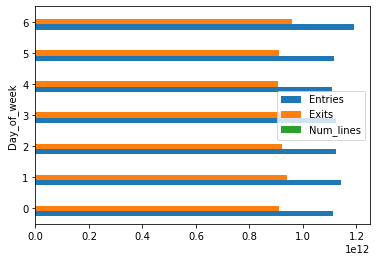

In [105]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('Day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [106]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head()



,Day_of_week,Entries,Exits,Num_lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303
2,2,1123655222441,920630864687,75713
3,3,1122723988662,920691927110,76607
4,4,1110224700078,906799065337,75573


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [107]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['Day_of_week'].map(weekend_map)

grouped


,Day_of_week,Entries,Exits,Num_lines,is_weekend
0,0,1114237052454,911938153513,76110,False
1,1,1143313287046,942230721477,77303,False
2,2,1123655222441,920630864687,75713,False
3,3,1122723988662,920691927110,76607,False
4,4,1110224700078,906799065337,75573,False
5,5,1115661545514,909142081474,74725,True
6,6,1192306179082,959223750461,75306,True


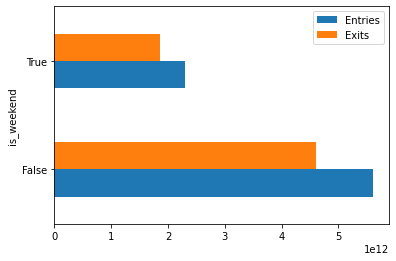

In [108]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['Entries', 'Exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [112]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(columns=['C/a', 'Scp'])
df.head(2)

,Linename,Unit,Station,Division,Date,Time,Desc,Entries,Exits,Num_lines,Day_of_week,Day_name
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5,Saturday
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

# I would say that woulb be useful to know and see linename and station plotted to make this plot more descriptive and useful for general purpose.
# As a plus I added a new column called Day_name that could add more context on a quick view. 
# Other plus could be grouping information by time as well to have more analysis context. 

## Summary

You practiced your data cleanup skills using Pandas.